##La logica difusa

Lógica difusa o lógica heurística se basa en lo relativo de lo observado como posición diferencial. Este tipo de lógica toma dos valores aleatorios, pero contextualizados y referidos entre sí. Así, por ejemplo, una persona que mida 2 metros es claramente una persona alta, si previamente se ha tomado el valor de persona baja y se ha establecido en 1 metro. Ambos valores están contextualizados a personas y referidos a una medida métrica lineal.

##Funcionamiento

Se adapta mejor al mundo real en el que vivimos, e incluso puede comprender y funcionar con nuestras expresiones, del tipo "hace mucho calor", "no es muy alto", "el ritmo del corazón está un poco acelerado", etc.

La clave de esta adaptación al lenguaje, se basa en comprender los cuantificadores de nuestro lenguaje, en los ejemplos de arriba "mucho", "muy" y "un poco". En la teoría de conjuntos difusos se definen también las operaciones de unión, intersección, diferencia, negación o complemento, y otras operaciones sobre conjuntos en los que se basa esta lógica.

Para cada conjunto difuso, existe asociada una función de pertenencia para sus elementos, que indican en qué medida el elemento forma parte de ese conjunto difuso. Las formas de las funciones de pertenencia más típicas son trapezoidal, lineal y curva.

Se basa en reglas heurísticas de la forma SI (antecedente) ENTONCES (consecuencia), donde el antecedente y la consecuencia son también conjuntos difusos, ya sea puros o resultado de operar con ellos. Algunos ejemplos de regla heurística para esta lógica:

    SI hace muchísimo calor ENTONCES disminuyo drásticamente la temperatura.
    SI voy a llegar un poco tarde ENTONCES aumento levemente la velocidad.

Los métodos de inferencia para esta base de reglas deben ser simples, veloces y eficaces. Los resultados de dichos métodos son un área final, fruto de un conjunto de áreas solapadas entre sí, donde cada área es resultado de una regla de inferencia. Para escoger una salida concreta a partir de tanta premisa difusa, el método más usado es el del centroide, en el que la salida final será el centro de gravedad del área total resultante.

Las reglas de las que dispone el motor de inferencia de un sistema difuso pueden ser formuladas por expertos, o bien aprendidas por el propio sistema, haciendo uso en este caso de Redes neuronales para fortalecer las futuras tomas de decisiones.

Los datos de entrada suelen ser recogidos por sensores, que miden las variables de entrada de un sistema. El motor de inferencias se basa en chips difusos, que están aumentando exponencialmente su capacidad de procesamiento de reglas año a año.

Para este ejercicio primero vamos a instalar las librerias para poder realizar la implementacion de un sistema de logica difusa, en este particular caso utilizaremos scikit-fuzzy para mas informacion pueden consultar https://pythonhosted.org/scikit-fuzzy/user_guide.html

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=1f4bc86da9b6156160a2f4112f6d9d35e608c71dc813b51ca9f48ee2ff6d88fa
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Para este ejercicio realizaremos un ejemplo de decision de logica difusa para medir la cantidad de propina que le deseamos dar a un mesero, utilizando las variables de calidad y servicio brindado.


## Variables de entrada (Antecedentes)

*   Calidad `[quality]`: la calidad de la comida
*   Servicio `[service]`: la calidad del servicio

## Variable de salida (Consecuencias)


*   Propina `[tip]`: La cantidad de dinero que vamos a darle al mesero


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')


Utilizaremos una funcion para poblar automembresia, esto significa que vamos a colocar diferentes conjuntos de membresia de manera automatica para colocarlos como lo que decidira que valores interactuan entre nuestros antecedentes contra los valores del universo.

In [4]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

Tambien se puede observar como se visualizan las pertenencias a una clase utilizando el metodo.view() de cada uno de los diferentes atributos tanto de calidad, servicio como de tips. (aun no lo declaramos en este caso, pero despues pueden observarlo tambien)

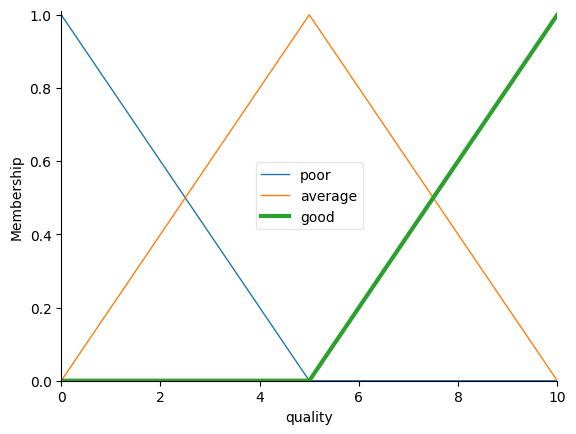

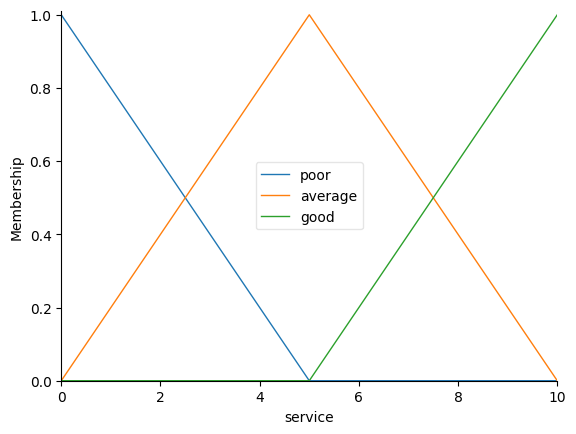

In [7]:
# You can see how these look with .view()
quality["good"].view()
service.view()

De la misma manera podemos declarar los parametros para la obtencion de la propina escribiendo nosotros de manera manual como queremos que se vean nuestras poblaciones de propinas, y de igual manera podemos visualizarlas.

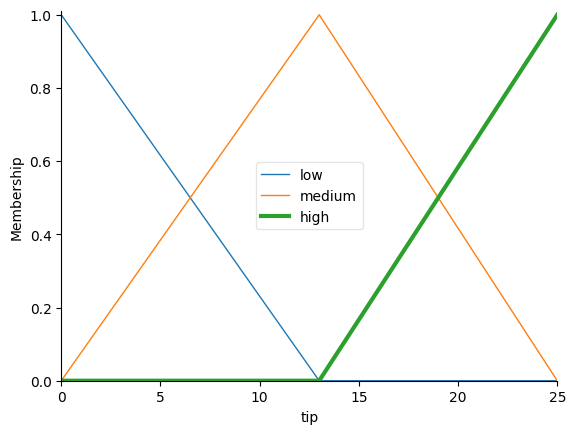

In [10]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
tip['high'].view()

Ahora visualizemos todas nuestras posibles opciones

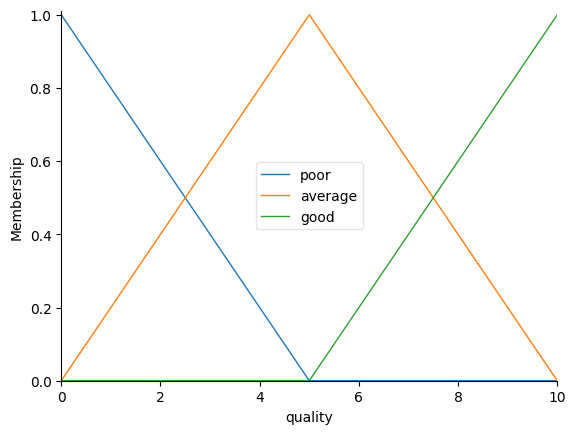

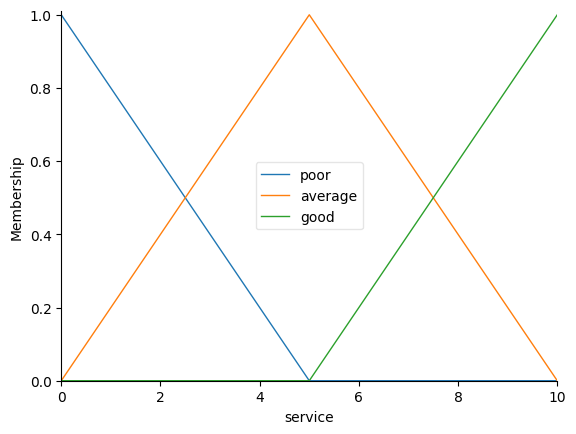

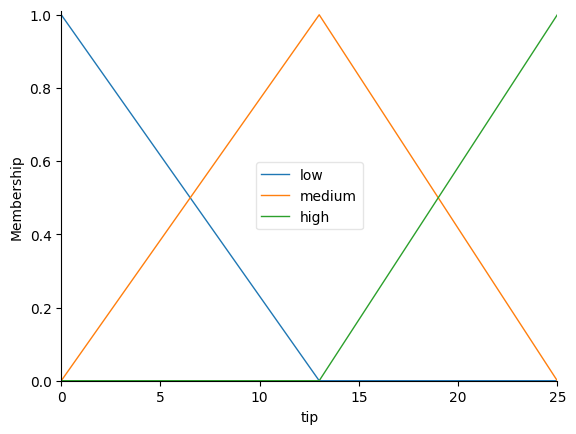

In [ ]:
quality.view()
service.view()
tip.view()

Ahora debemos crear las reglas, para esto, utilizaremos los mismos terminos que creamos anteriormente para declarar que cuando una variable, tenga un valor, que pertenezca a una membresia.


ej: if quality[poor] or service['poor'] then tip['low']

Apoyo: IF {Clausulas de antecedentes} Then {Clausulas de consecuencia}
Se pueden utilizar cualquier operadores logicos como AND, OR, NOR, NAND

(<Figure size 640x480 with 1 Axes>, <Axes: >)

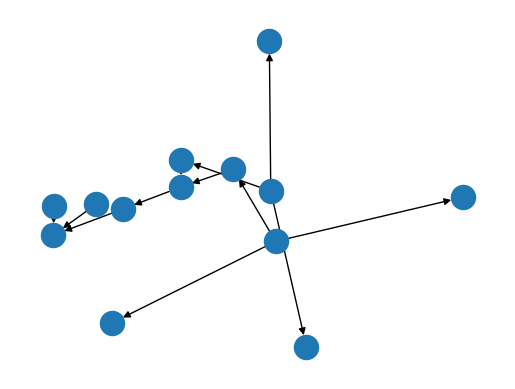

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule4 = ctrl.Rule(service['poor'] | quality['good'], tip['medium'])
rule5 = ctrl.Rule(service['average'] | quality['good'], tip['high'])

rule1.view()

Utilizamos las reglas creadas con nuestros conjuntos difusos para crear nuestro sistema de control y finalmente lo simulamos utilizando el sistema de control que hemos creado.

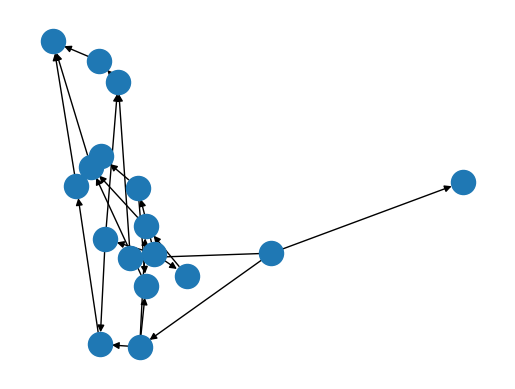

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping_ctrl.view()

Ya con nuestro sistema de control difuso montado, podemos realizar tantos experimentos como querramos, creamos nuestras variables de entrada y computamos la informacion

14.66666666666667


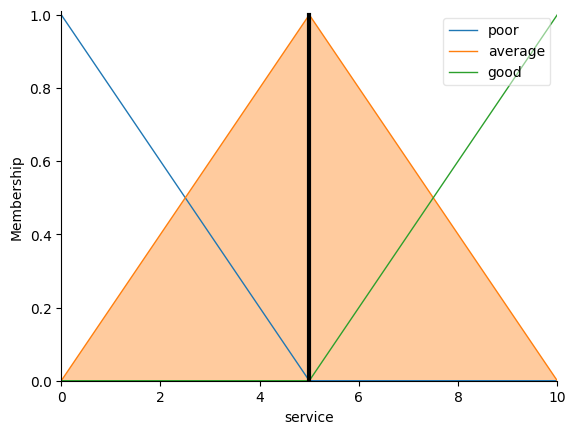

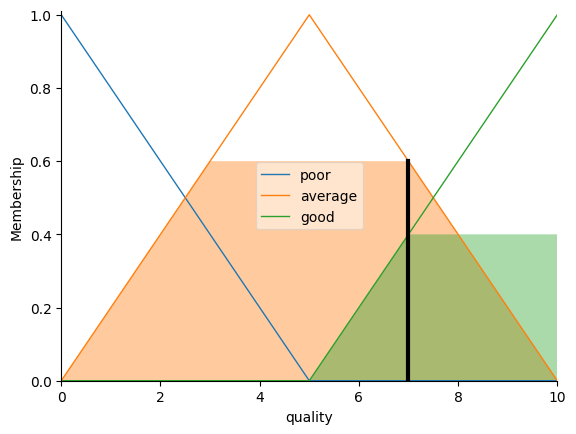

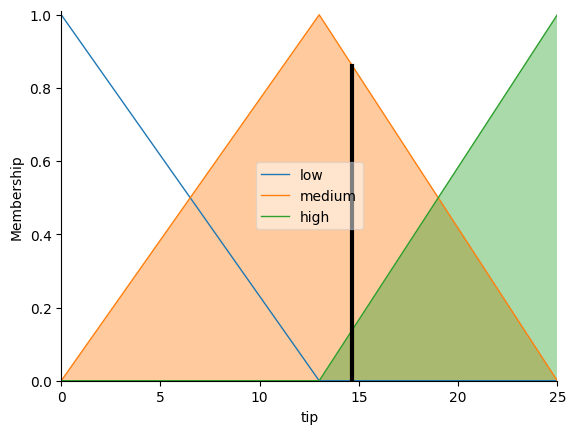

In [ ]:
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 7
tipping.input['service'] = 5

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
service.view(sim= tipping)
quality.view(sim= tipping)
tip.view(sim=tipping)